## ERA5 point data time series

In [1]:
import earthkit as ek

In [2]:
dataset = "reanalysis-era5-single-levels-timeseries"
request = {
    "variable": ["2m_temperature"],
    "location": {"longitude": -1, "latitude": 51.5},
    "date": ["2025-08-20/2025-08-23"],
    "data_format": "netcdf"
}

data = ek.data.from_source("cds", dataset, request)

In [3]:
ds = data.to_xarray()
ds

<xarray.Dataset>
Dimensions:     (valid_time: 96)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-08-20 ... 2025-08-23T23:00:00
Data variables:
    t2m         (valid_time) float32 dask.array<chunksize=(96,), meta=np.ndarray>
    latitude    float64 ...
    longitude   float64 ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-09-02T04:48 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

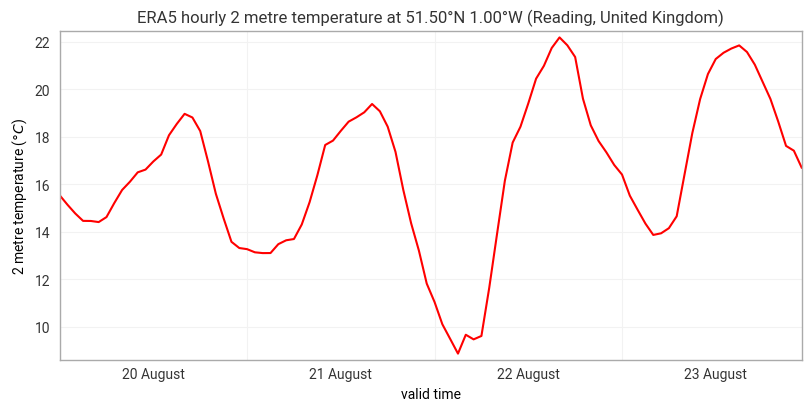

In [4]:
ek.plots.timeseries(
    ds,
    color="red",
    title="ERA5 hourly {variable_name} at {latitude:%Lt} {longitude:%Ln} ({location:%c}, {location:%C})",
    xticks={
        "frequency": "D",
        "format": "%d %B",
        "period": True,
    },
    yunits="celsius",
).show()